In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
%matplotlib inline


In [2]:
# load data trian set
df_train=pd.read_csv('C:/Users/hp/Desktop/assignment/cab_train.csv')
df_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [3]:
# load data test set
df_test=pd.read_csv('C:/Users/hp/Desktop/assignment/cab_test.csv')
df_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [4]:
df_train.shape

(16067, 7)

In [5]:
df_test.shape

(9914, 6)

In [6]:
df_train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [7]:
df_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [8]:
df_train['fare_amount']=df_train['fare_amount'].fillna(0)

In [9]:
df_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [10]:
df_train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [11]:
#Convert fare_amount from object to numeric
df_train["fare_amount"] = pd.to_numeric(df_train["fare_amount"],errors = "coerce")

In [12]:
df_train.dropna(subset=["pickup_datetime"])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,0.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [13]:
df_train['pickup_datetime']=pd.to_datetime(df_train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC',errors='coerce')


In [14]:
df_train['year']=df_train['pickup_datetime'].dt.year
df_train['month']=df_train['pickup_datetime'].dt.month
df_train['date']=df_train['pickup_datetime'].dt.day
df_train['Day'] = df_train['pickup_datetime'].dt.dayofweek
df_train['Hour'] = df_train['pickup_datetime'].dt.hour
df_train['Minute'] = df_train['pickup_datetime'].dt.minute

In [15]:
df_test["pickup_datetime"] = pd.to_datetime(df_test["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC",errors='coerce')

In [16]:
df_test['year']=df_test['pickup_datetime'].dt.year
df_test['month']=df_test['pickup_datetime'].dt.month
df_test['date']=df_test['pickup_datetime'].dt.day
df_test['Day'] = df_test['pickup_datetime'].dt.dayofweek
df_test['Hour'] = df_test['pickup_datetime'].dt.hour
df_test['Minute'] = df_test['pickup_datetime'].dt.minute

In [17]:
df_train.dtypes
df_test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
month                         int64
date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [18]:
df_train['pickup_datetime'].isnull().sum()

1

In [19]:
df_train = df_train.drop(df_train[df_train['pickup_datetime'].isnull()].index, axis=0)
print(df_train.shape)
print(df_train['pickup_datetime'].isnull().sum())

(16066, 13)
0


In [20]:
df_train["passenger_count"].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [21]:
df_train=df_train.drop(df_train[df_train['passenger_count']>6].index,axis=0)    #5345 passenger is not possible so it will drop


In [22]:
df_train=df_train.drop(df_train[df_train['passenger_count']==0].index,axis=0)         #drop 0 passenger count

In [23]:
df_train['passenger_count'].describe()

count    15934.000000
mean         1.649581
std          1.265943
min          0.120000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [24]:
df_train=df_train.drop(df_train[df_train['passenger_count']==0.12].index,axis=0)

In [25]:
#removing passanger_count missing values rows
df_train = df_train.drop(df_train[df_train['passenger_count'].isnull()].index, axis=0)
print(df_train.shape)
print(df_train['passenger_count'].isnull().sum())

(15933, 13)
0


In [26]:
# for set the values in decending values by the shorting method
df_train['fare_amount'].sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
6630       128.83
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
6668        76.80
8363        76.00
10524       75.80
11019       75.33
13615       75.00
15023       73.30
1494        70.00
4118        69.70
9651        66.30
           ...   
1427         1.14
2780         0.01
240          0.00
703          0.00
8            0.00
913          0.00
350          0.00
1628         0.00
26           0.00
2412         0.00
836          0.00
840          0.00
498          0.00
1574         0.00
305          0.00
168          0.00
667          0.00
2458         0.00
69           0.00
8178         0.00
126          0.00
1712         0.00
746          0.00
8226         0.00
10002     

In [27]:
from collections import Counter
Counter(df_train['fare_amount']<0)

Counter({False: 15930, True: 3})

In [28]:
df_train.shape

(15933, 13)

In [29]:
df_train[df_train['fare_amount']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,Day,Hour,Minute
8,0.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1.0,2012.0,12.0,3.0,0.0,13.0,10.0
26,0.0,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,2011.0,2.0,7.0,0.0,20.0,1.0
69,0.0,2015-05-12 23:51:42,-73.954796,40.779335,-73.944931,40.780087,1.0,2015.0,5.0,12.0,1.0,23.0,51.0
126,0.0,2013-09-17 04:22:00,-73.987210,40.729325,-73.931985,40.697207,1.0,2013.0,9.0,17.0,1.0,4.0,22.0
168,0.0,2009-01-16 21:10:00,-73.994143,40.751193,-73.988897,40.759742,1.0,2009.0,1.0,16.0,4.0,21.0,10.0
240,0.0,2009-06-20 19:28:37,-73.979345,40.776630,-73.973842,40.757074,1.0,2009.0,6.0,20.0,5.0,19.0,28.0
305,0.0,2014-07-11 05:07:00,-73.951660,40.772657,-74.010583,40.721405,2.0,2014.0,7.0,11.0,4.0,5.0,7.0
350,0.0,2014-09-05 15:23:00,-73.968260,40.765140,-73.961115,40.774882,6.0,2014.0,9.0,5.0,4.0,15.0,23.0
455,0.0,2014-07-03 01:34:00,-73.968087,40.755140,-73.952622,40.823312,5.0,2014.0,7.0,3.0,3.0,1.0,34.0
498,0.0,2009-03-16 04:47:17,0.000000,0.000000,0.000000,0.000000,1.0,2009.0,3.0,16.0,0.0,4.0,47.0


In [30]:
df_train['fare_amount'].isnull().sum()

1

In [31]:
df_train = df_train.drop(df_train[df_train['fare_amount'].isnull()].index, axis=0)

In [32]:
df_train['fare_amount'].isnull().sum()

0

In [33]:
df_train.shape

(15932, 13)

In [34]:
df_train[df_train['fare_amount']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,Day,Hour,Minute
8,0.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1.0,2012.0,12.0,3.0,0.0,13.0,10.0
26,0.0,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,2011.0,2.0,7.0,0.0,20.0,1.0
69,0.0,2015-05-12 23:51:42,-73.954796,40.779335,-73.944931,40.780087,1.0,2015.0,5.0,12.0,1.0,23.0,51.0
126,0.0,2013-09-17 04:22:00,-73.987210,40.729325,-73.931985,40.697207,1.0,2013.0,9.0,17.0,1.0,4.0,22.0
168,0.0,2009-01-16 21:10:00,-73.994143,40.751193,-73.988897,40.759742,1.0,2009.0,1.0,16.0,4.0,21.0,10.0
240,0.0,2009-06-20 19:28:37,-73.979345,40.776630,-73.973842,40.757074,1.0,2009.0,6.0,20.0,5.0,19.0,28.0
305,0.0,2014-07-11 05:07:00,-73.951660,40.772657,-74.010583,40.721405,2.0,2014.0,7.0,11.0,4.0,5.0,7.0
350,0.0,2014-09-05 15:23:00,-73.968260,40.765140,-73.961115,40.774882,6.0,2014.0,9.0,5.0,4.0,15.0,23.0
455,0.0,2014-07-03 01:34:00,-73.968087,40.755140,-73.952622,40.823312,5.0,2014.0,7.0,3.0,3.0,1.0,34.0
498,0.0,2009-03-16 04:47:17,0.000000,0.000000,0.000000,0.000000,1.0,2009.0,3.0,16.0,0.0,4.0,47.0


In [35]:
df_train=df_train.drop(df_train[df_train['fare_amount']<1].index,axis=0)

In [36]:
df_train.shape

(15904, 13)

In [37]:
df_train['fare_amount'].min()

1.14

In [38]:
df_train['fare_amount'].max()

54343.0

In [39]:
df_train=df_train.drop(df_train[df_train['fare_amount']>460].index,axis=0)

In [40]:
df_train['fare_amount'].max()

453.0

In [41]:
#Lattitude are lies between -90 to 90
#Longitude are lies between 180 to 180
# drop if lattitude and longitude are out from range
df_train = df_train.drop(df_train[df_train['pickup_latitude']<-90].index,axis=0)
df_train = df_train.drop(df_train[df_train['pickup_latitude']>90].index,axis=0)
df_train = df_train.drop(df_train[df_train['pickup_longitude']<-180].index,axis=0)
df_train = df_train.drop(df_train[df_train['pickup_longitude']>180].index,axis=0)
df_train = df_train.drop(df_train[df_train['dropoff_latitude']<-90].index,axis=0)
df_train = df_train.drop(df_train[df_train['dropoff_latitude']>90].index,axis=0)
df_train = df_train.drop(df_train[df_train['dropoff_longitude']<-180].index,axis=0)
df_train = df_train.drop(df_train[df_train['dropoff_longitude']>180].index,axis=0)


In [42]:
df_train.shape

(15901, 13)

In [43]:
df_train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [44]:
#calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6400
    km = 6400* c
    return km

In [45]:
df_train['distance'] =df_train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [46]:
df_test['distance'] = df_test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [47]:
df_train = df_train.drop(df_train[df_train['distance']== 0].index, axis=0)
df_train.shape

(15447, 14)

In [48]:
#we will remove the rows whose distance values is very high which is more than 150kms
df_train = df_train.drop(df_train[df_train['distance'] > 151 ].index, axis=0)
df_train.shape


(15424, 14)

In [49]:
rm= ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
df_train = df_train.drop(rm, axis = 1)

In [50]:
df_train.shape

(15424, 8)

In [51]:
df_train.head()

,fare_amount,passenger_count,year,month,date,Day,Hour,distance
0,4.5,1.0,2009.0,6.0,15.0,0.0,17.0,1.035456
1,16.9,1.0,2010.0,1.0,5.0,1.0,16.0,8.488598
2,5.7,2.0,2011.0,8.0,18.0,3.0,0.0,1.395850
3,7.7,1.0,2012.0,4.0,21.0,5.0,4.0,2.812012
4,5.3,1.0,2010.0,3.0,9.0,1.0,7.0,2.008257


In [52]:
df_train['passenger_count'] = df_train['passenger_count'].astype('int64')
df_train['year'] = df_train['year'].astype('int64')
df_train['month'] = df_train['month'].astype('int64')
df_train['date'] = df_train['date'].astype('int64')
df_train['Day'] = df_train['Day'].astype('int64')
df_train['Hour'] = df_train['Hour'].astype('int64')

In [53]:
df_train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
month                int64
date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [54]:
rmtest = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'Minute']
df_test = df_test.drop(rmtest, axis = 1)

In [55]:
df_test.dtypes

passenger_count      int64
year                 int64
month                int64
date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

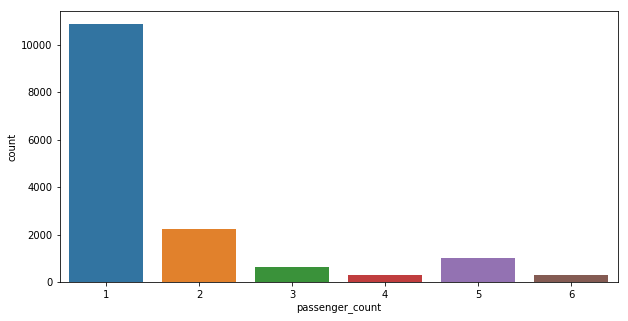

In [56]:
# Count plot on passenger count
plt.figure(figsize=(10,5))
sns.countplot(x="passenger_count", data=df_train)
plt.show()

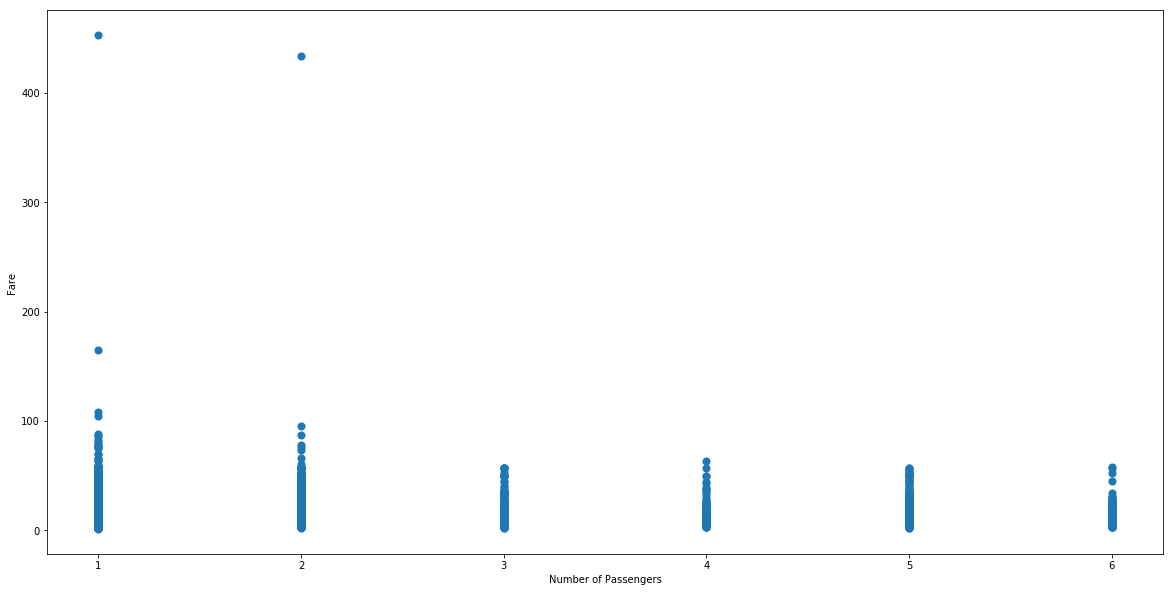

In [57]:
#Relationship beetween number of passengers and Fare

plt.figure(figsize=(20,10))
plt.scatter(x=df_train['passenger_count'], y=df_train['fare_amount'], s=50)
plt.xlabel('Number of Passengers')
plt.ylabel('Fare')
plt.show()

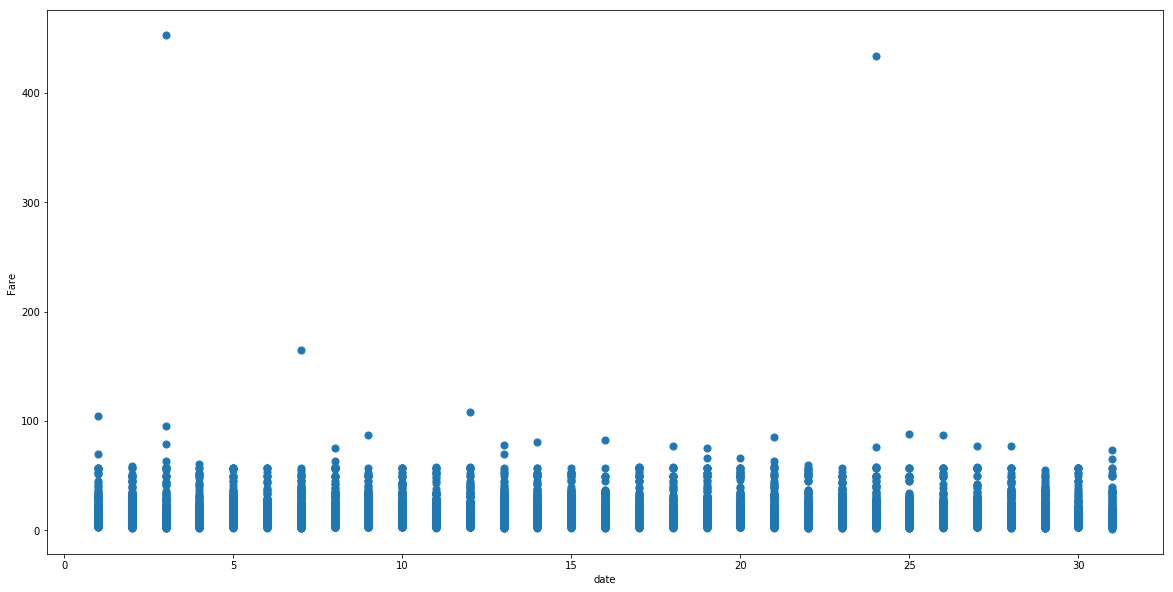

In [58]:
#Relationship between date and Fare
plt.figure(figsize=(20,10))
plt.scatter(x=df_train['date'], y=df_train['fare_amount'], s=50)
plt.xlabel('date')
plt.ylabel('Fare')
plt.show()

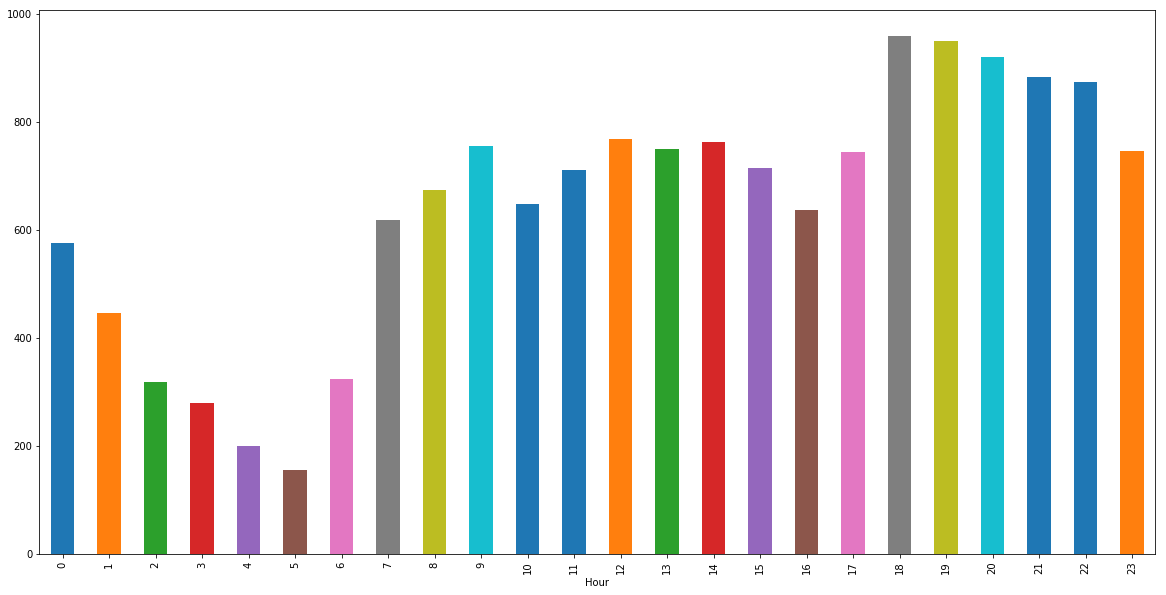

In [59]:
plt.figure(figsize=(20,10))
df_train.groupby(df_train["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

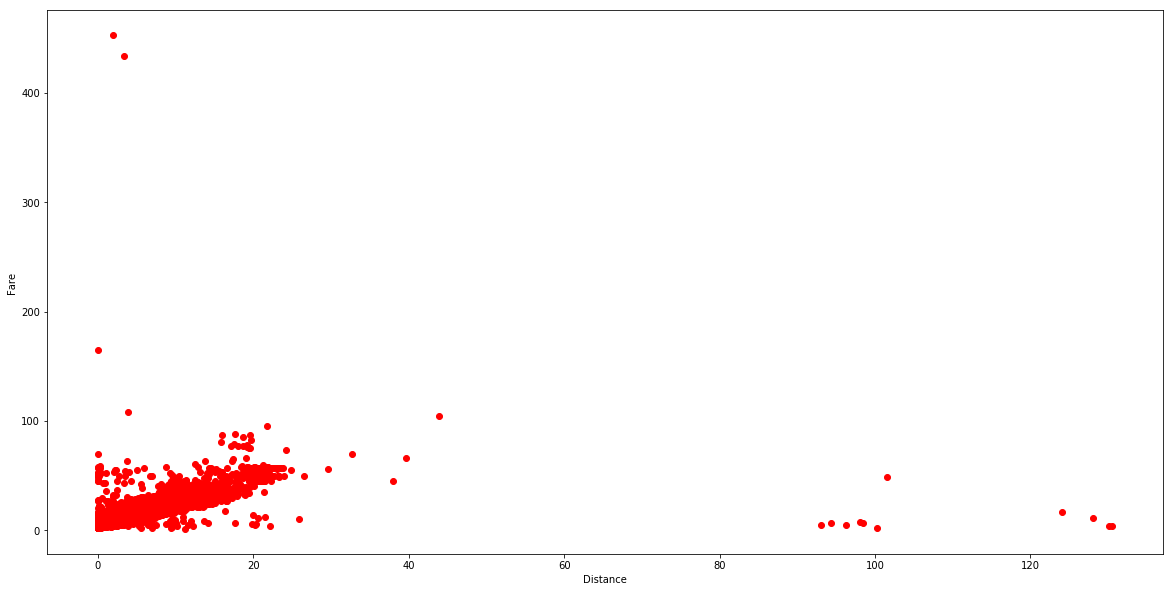

In [60]:
#Relationship between distance and fare 
plt.figure(figsize=(20,10))
plt.scatter(x = df_train['distance'],y = df_train['fare_amount'],c = "r")
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

fare_amount


C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


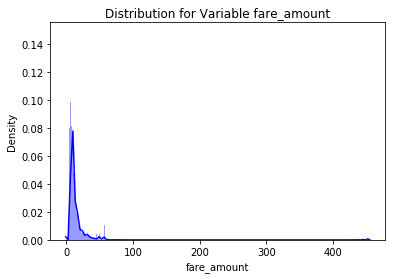

distance


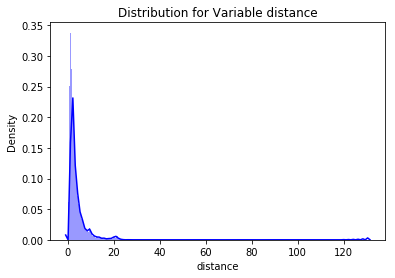

In [61]:
#Normality check of training data is uniformly distributed or not-

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(df_train[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [62]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
df_train['fare_amount'] = np.log1p(df_train['fare_amount'])

#since skewness of distance variable is high, apply log transform to reduce the skewness-
df_train['distance'] = np.log1p(df_train['distance'])

fare_amount


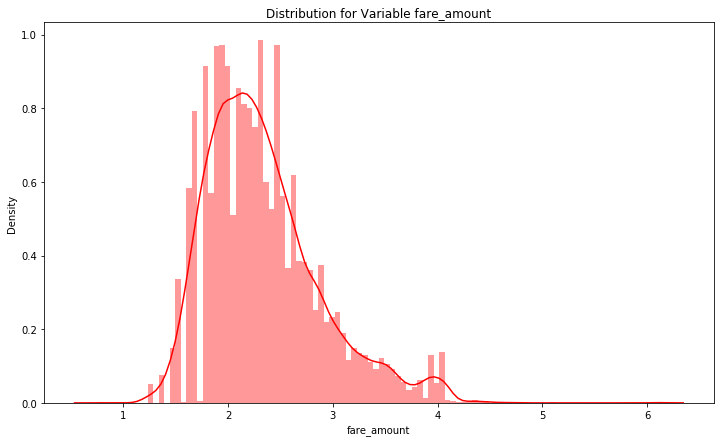

distance


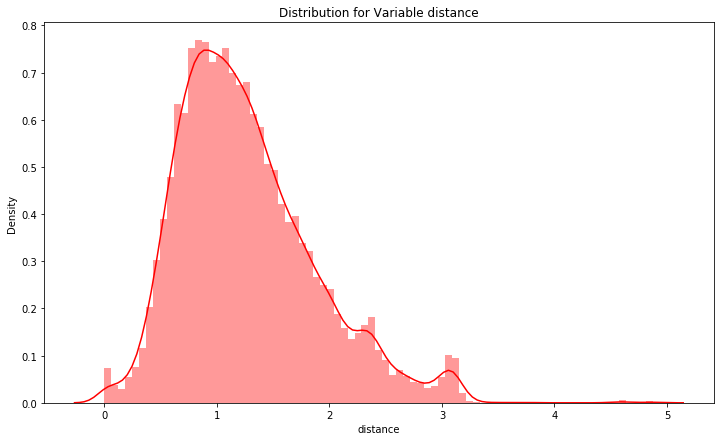

In [64]:
#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in ['fare_amount', 'distance']:
    print(i)
    plt.figure(figsize=(12,7))
    sns.distplot(df_train[i],bins='auto',color='red')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

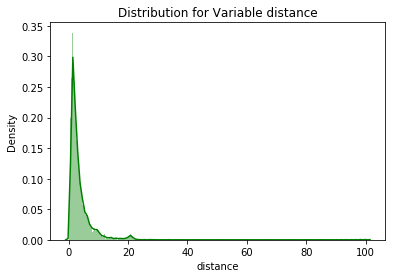

In [65]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(df_test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [66]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
df_test['distance'] = np.log1p(df_test['distance'])

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


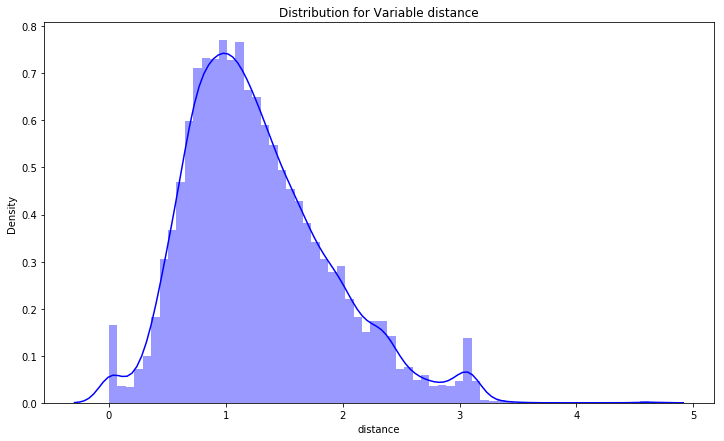

In [92]:
#rechecking the distribution for distance
plt.figure(figsize=(12,7))
sns.distplot(df_test['distance'],bins='auto',color='blue')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [68]:
#train test split for further modelling
X_train, X_test, y_train, y_test = train_test_split( df_train.iloc[:, df_train.columns != 'fare_amount'], 
                         df_train.iloc[:, 0], test_size = 0.20, random_state = 1)

In [69]:
print(X_train.shape)
print(X_test.shape)

(12339, 7)
(3085, 7)


In [70]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

In [71]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

In [72]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [73]:
from sklearn.metrics import mean_squared_error
#calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

In [74]:
print("RMS Error For Training data = "+str(RMSE_train_LR))
print("RMS Error For Test data = "+str(RMSE_test_LR))

RMS Error For Training data = 0.27534581346949777
RMS Error For Test data = 0.24543871076844195


In [75]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, pred_train_LR)

0.7494869249991962

In [76]:
r2_score(y_test, pred_test_LR)

0.7826450726669177

In [77]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [78]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

In [79]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [80]:
print("RMSE For Training data = "+str(RMSE_train_DT))
print("RMSE For Test data = "+str(RMSE_test_DT))

RMSE For Training data = 0.29962109020770195
RMSE For Test data = 0.28674606171586176


In [81]:
## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

0.7033678616157002

In [82]:
from sklearn.ensemble import RandomForestRegressor
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

In [83]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

In [84]:
##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [85]:
print("RMSE For Training data = "+str(RMSE_train_RF))
print("RMSE For Test data = "+str(RMSE_test_RF))

RMSE For Training data = 0.09611933292408252
RMSE For Test data = 0.23498980607960857


In [86]:
## calculate R^2 for train data

r2_score(y_train, pred_train_RF)

0.9694722399876309

In [87]:
#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

0.8007577609698167

In [88]:
 from sklearn.model_selection import GridSearchCV 
## Grid Search CV for random Forest model
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(df_test)

In [89]:
predictions_GRF_test_Df

array([2.36760025, 2.39383317, 1.6809062 , ..., 4.01224357, 3.29348722,
       2.0360277 ])

In [90]:
df_test['Predicted_fare'] = predictions_GRF_test_Df

In [91]:
df_test.head(10)

,passenger_count,year,month,date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,1.204123,2.367600
1,1,2015,1,27,1,13,1.234422,2.393833
2,1,2011,10,8,5,11,0.483317,1.680906
3,1,2012,12,1,5,21,1.088548,2.209257
4,1,2012,12,1,5,21,1.858144,2.815112
5,1,2012,12,1,5,21,1.443907,2.400284
6,1,2011,10,6,3,12,0.659504,1.820060
7,1,2011,10,6,3,12,3.119637,3.960913
8,1,2011,10,6,3,12,1.587519,2.463025
9,1,2014,2,18,1,15,0.744220,2.007261
